In [18]:
from matplotlib import pyplot

import numpy as np

from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import auc
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve

# Evaluation metrics
In this lab we discuss and demonstrate the evaluation of predictive algorithms. We will study the fundamental metrics and analysis methods:
* Accuracy, Precision, Recall, F1 measure 
* Precision-Recall 
* ROC curve

# Balanced data

## Generation of toy data
Below we generate 10000 data samples and their corresponding classes. The variable X is your problem data and y is your label data.
We then divide data and labels into train and test.

In [23]:
X, y = make_classification(n_samples=10000, n_classes=2, weights=[0.5,0.5], random_state=42)
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.2, random_state=2)

In [24]:
# Exercise 1: Compute the frequency of each class in your train and test data.



## Train a model for classification

In [25]:
model = LogisticRegression()
model.fit(trainX, trainy)

LogisticRegression()

In [6]:
predictions = model.predict(testX)

## Accuracy, Precision and Recall

In [7]:
accuracy = accuracy_score(testy, predictions)
print('Accuracy: %.3f' % accuracy)

Accuracy: 0.957


In [8]:
print(classification_report(testy, predictions))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98      1884
           1       0.73      0.41      0.53       116

    accuracy                           0.96      2000
   macro avg       0.85      0.70      0.75      2000
weighted avg       0.95      0.96      0.95      2000



## ROC Curve vs. Precision-Recall Curve

In [9]:
probs = model.predict_proba(testX)
probs = probs[:, 1]

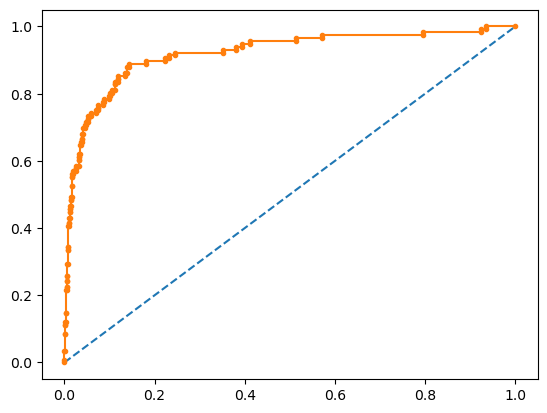

AUC: 0.920


In [10]:
fpr, tpr, thresholds = roc_curve(testy, probs)
pyplot.plot([0, 1], [0, 1], linestyle='--')
pyplot.plot(fpr, tpr, marker='.')
pyplot.show()
auc_score = roc_auc_score(testy, probs)
print('AUC: %.3f' % auc_score)

## Precision-Recall curve

In [11]:
precision, recall, thresholds = precision_recall_curve(testy, probs)
auc_score = auc(recall, precision)

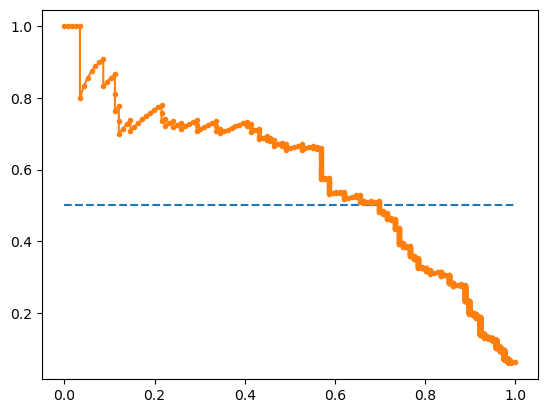

AUC: 0.577


In [12]:
pyplot.plot([0, 1], [0.5, 0.5], linestyle='--')
pyplot.plot(recall, precision, marker='.')
pyplot.show()
print('AUC: %.3f' % auc_score)

# Imbalanced data

The above metrics provide very different insights when the data is imbalanced.



In [29]:
# Exercise 2: Repeat the previous example with imbalanced data and explain how far each metric is providing a fair report of results.

X, y = make_classification(n_samples=10000, n_classes=2, weights=[0.95,0.05], random_state=42)
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.2, random_state=2)
